# Project Loan Default Prediction

In [117]:
#All Libraries used
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#skitlearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#depois verificar se usámos tudo


In [118]:
#Import Dataset
df = pd.read_csv('loan_default_prediction.csv')
#print(df.columns)
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [119]:
#remover variáveis que a priori não fazem sentido; ver relatorio para justificações
df=df.drop(['ID','Validation','Designation','Debt_to_Income','Postal_Code','Deprecatory_Records',\
            'Inquiries','Gross_Collection','Sub_GGGrade','Total_Unpaid_CL','File_Status'],axis=1)
print(df.columns)

Index(['Asst_Reg', 'GGGrade', 'Experience', 'Yearly_Income', 'Home_Status',
       'Unpaid_2_years', 'Already_Defaulted', 'Lend_Amount',
       'Interest_Charged', 'Usage_Rate', 'Present_Balance', 'State',
       'Account_Open', 'Duration', 'Unpaid_Amount', 'Reason', 'Claim_Type',
       'Due_Fee', 'Default'],
      dtype='object')


In [120]:
#VER SE VARIAVEL NUMERICA TEM ALGUM STRING
df['Default'].value_counts()/df.shape[0] #quantos defaults temos
#print(df[df['Default']==1]['Default'].value_counts())

0    0.811291
1    0.188709
Name: Default, dtype: float64

In [121]:
#Conversão dos anos de experiencia para númerico
df['Experience']=df['Experience'].apply(lambda i: 10 if i[0:1]=='>' else 1 if i[0:1]=='<' else int(i[0:1]))
#Conversão da duração para númerico
df['Duration']=df['Duration'].apply(lambda i : i.replace(' years','')).astype(int)
#ver resultado
df.head()

,Asst_Reg,GGGrade,Experience,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,State,Account_Open,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,421802,II,10,633600.00,MORTGAGE,0,0,42023.25,15.39,88.924,607161.90,California,17,3,31216.05,debt consolidation,I,0.0,0
1,3964312,IV,7,85483.20,RENT,0,0,38133.00,9.94,102.856,269234.06,NC,15,5,11660.49,debt consolidation,I,0.0,0
2,4247560,III,1,79200.00,RENT,0,0,17100.00,22.35,60.372,22476.53,Florida,7,5,5637.87,major purchase,I,0.0,0
3,197179,III,1,61600.00,RENT,0,0,5130.00,10.36,116.272,15242.09,NewJersey,9,3,15607.17,major purchase,I,0.0,1
4,4646684,V,2,68053.92,RENT,0,0,19665.00,13.68,127.280,65433.94,LA,10,5,27472.86,debt consolidation,I,0.0,0


In [122]:
#ver dimensão atual da base
df.shape

(87500, 19)

In [123]:
#verificar se todos os elementos de uma feature são do mesmo tipo
#quando uma feature tem varios tipos, df.ddtype atribui "object" como tipo
for i in df.columns:    
    dftype=df[i].apply(type)
    print(dftype.value_counts())

<class 'int'>    87500
Name: Asst_Reg, dtype: int64
<class 'str'>    87500
Name: GGGrade, dtype: int64
<class 'int'>    87500
Name: Experience, dtype: int64
<class 'float'>    87500
Name: Yearly_Income, dtype: int64
<class 'str'>    87500
Name: Home_Status, dtype: int64
<class 'int'>    87500
Name: Unpaid_2_years, dtype: int64
<class 'int'>    87500
Name: Already_Defaulted, dtype: int64
<class 'float'>    87500
Name: Lend_Amount, dtype: int64
<class 'float'>    87500
Name: Interest_Charged, dtype: int64
<class 'float'>    87500
Name: Usage_Rate, dtype: int64
<class 'float'>    87500
Name: Present_Balance, dtype: int64
<class 'str'>    87500
Name: State, dtype: int64
<class 'int'>    87500
Name: Account_Open, dtype: int64
<class 'int'>    87500
Name: Duration, dtype: int64
<class 'float'>    87500
Name: Unpaid_Amount, dtype: int64
<class 'str'>    87500
Name: Reason, dtype: int64
<class 'str'>    87500
Name: Claim_Type, dtype: int64
<class 'float'>    87500
Name: Due_Fee, dtype: int64
<

In [124]:
#ver elementos nulos do dataset em %
display(df.isnull().sum()/df.shape[0])
#info
df.info()

Asst_Reg             0.000000
GGGrade              0.000000
Experience           0.000000
Yearly_Income        0.063714
Home_Status          0.000000
Unpaid_2_years       0.000000
Already_Defaulted    0.000000
Lend_Amount          0.000000
Interest_Charged     0.000000
Usage_Rate           0.000000
Present_Balance      0.000000
State                0.000000
Account_Open         0.000000
Duration             0.000000
Unpaid_Amount        0.055451
Reason               0.000000
Claim_Type           0.000000
Due_Fee              0.000000
Default              0.000000
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Asst_Reg           87500 non-null  int64  
 1   GGGrade            87500 non-null  object 
 2   Experience         87500 non-null  int64  
 3   Yearly_Income      81925 non-null  float64
 4   Home_Status        87500 non-null  object 
 5   Unpaid_2_years     87500 non-null  int64  
 6   Already_Defaulted  87500 non-null  int64  
 7   Lend_Amount        87500 non-null  float64
 8   Interest_Charged   87500 non-null  float64
 9   Usage_Rate         87500 non-null  float64
 10  Present_Balance    87500 non-null  float64
 11  State              87500 non-null  object 
 12  Account_Open       87500 non-null  int64  
 13  Duration           87500 non-null  int64  
 14  Unpaid_Amount      82648 non-null  float64
 15  Reason             87500 non-null  object 
 16  Claim_Type         875

In [125]:
#eliminar observações com pelo menos uma feature sem valores
df=df.dropna()
df.isnull().sum()
display(df.shape)
#drop duplicates
df.drop_duplicates()
df.shape

(77376, 19)

(77376, 19)

In [126]:
#DATA FRAME COM VARIÁVEIS NUMERICAS CONTINUAS
vnumcont=['Asst_Reg','Experience','Yearly_Income','Lend_Amount','Interest_Charged','Usage_Rate','Present_Balance',\
            'Due_Fee','Unpaid_Amount']
#criar copia para não "estragar" dados originais
numcont=df[vnumcont].copy()
numcont.head()

,Asst_Reg,Experience,Yearly_Income,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Due_Fee,Unpaid_Amount
0,421802,10,633600.00,42023.25,15.39,88.924,607161.90,0.0,31216.05
1,3964312,7,85483.20,38133.00,9.94,102.856,269234.06,0.0,11660.49
2,4247560,1,79200.00,17100.00,22.35,60.372,22476.53,0.0,5637.87
3,197179,1,61600.00,5130.00,10.36,116.272,15242.09,0.0,15607.17
4,4646684,2,68053.92,19665.00,13.68,127.280,65433.94,0.0,27472.86


In [127]:
#análise das estatísticas descritivas
#médias, desvios padrão, max, min percentis...
numcont.describe()

,Asst_Reg,Experience,Yearly_Income,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Due_Fee,Unpaid_Amount
count,7.737600e+04,77376.000000,7.737600e+04,77376.000000,77376.000000,77376.000000,7.737600e+04,77376.000000,7.737600e+04
mean,3.801793e+06,6.144360,1.349915e+05,25927.213109,16.518339,95.489869,2.363786e+05,0.317507,2.953228e+04
std,2.289120e+06,3.538256,9.953162e+04,14443.738100,4.905345,40.610291,2.553444e+05,3.556516,3.757589e+04
min,2.484700e+04,1.000000,8.800000e+03,1710.000000,8.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.486830e+06,3.000000,8.330256e+04,15048.000000,12.310000,66.048000,5.181092e+04,0.000000,1.144332e+04
50%,4.133126e+06,7.000000,1.144000e+05,23940.000000,16.490000,97.008000,1.386309e+05,0.000000,2.088594e+04
75%,5.956216e+06,10.000000,1.601600e+05,34200.000000,20.772500,126.592000,3.535544e+05,0.000000,3.643497e+04
max,7.351847e+06,10.000000,8.264031e+06,59850.000000,25.000000,1534.756000,5.629234e+06,169.050000,1.338778e+06


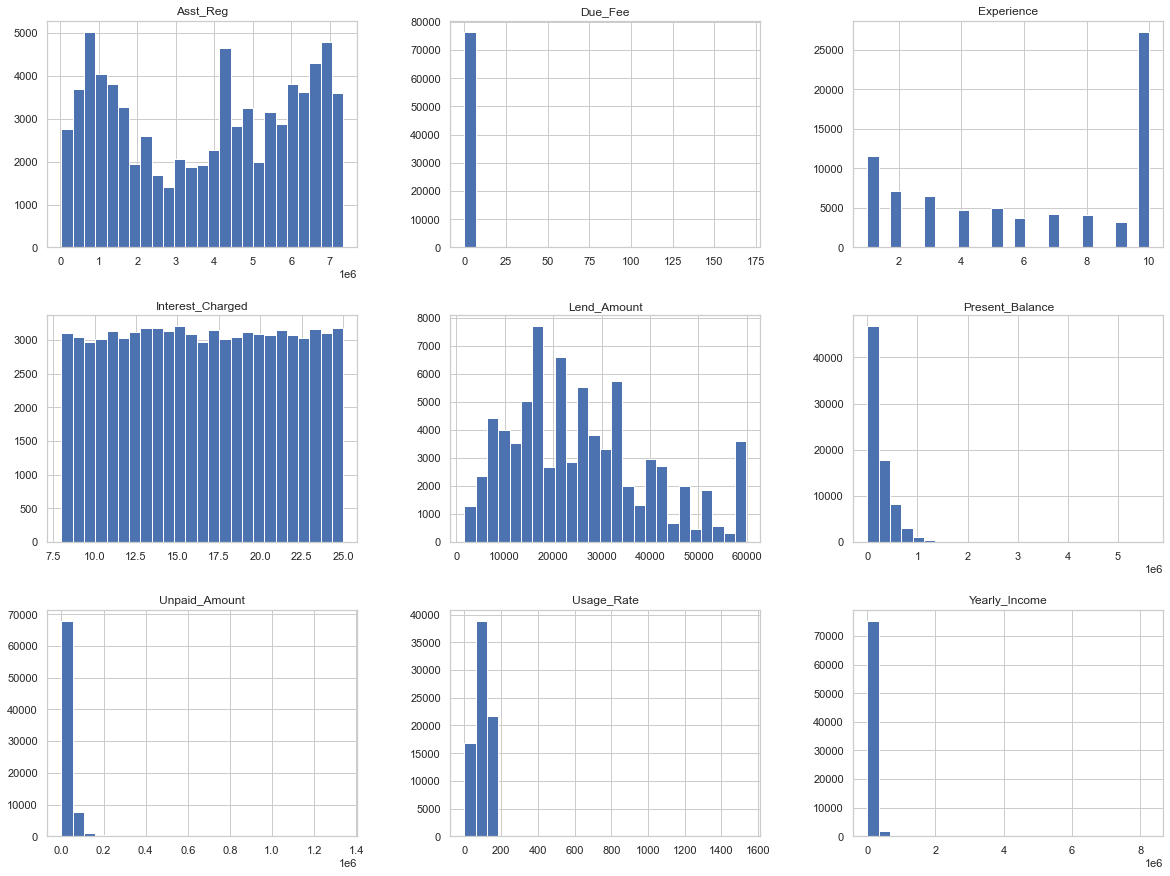

In [128]:
#plots
numcont.hist(bins=25,figsize=(20,15))
plt.show()

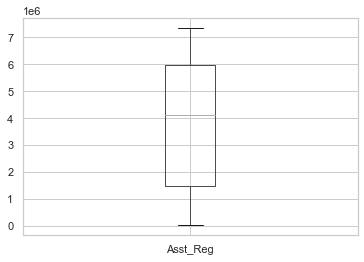

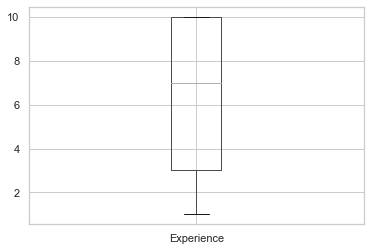

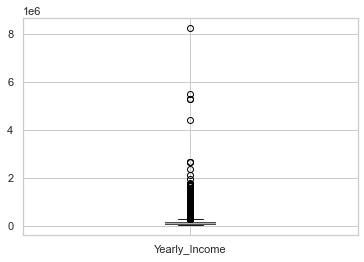

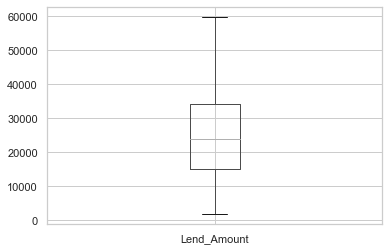

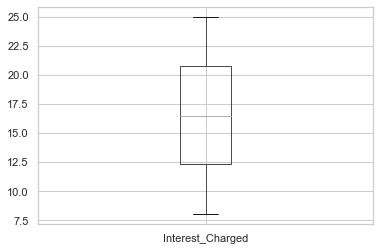

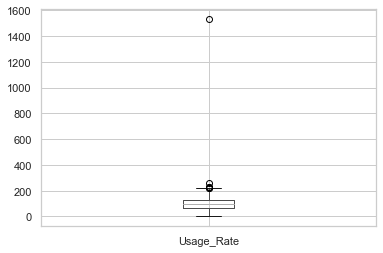

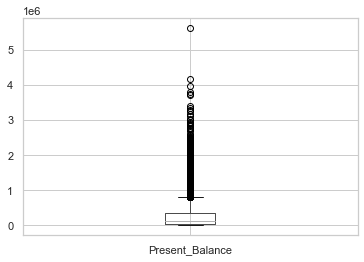

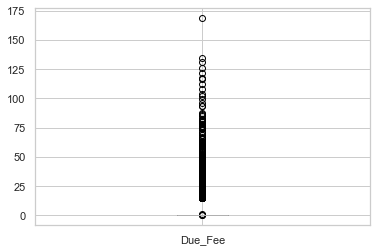

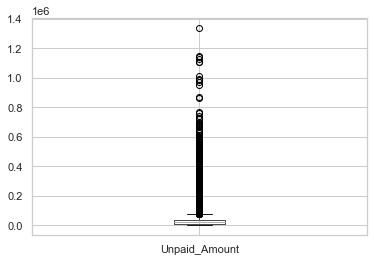

In [129]:
#df.boxplot(by ='day', column =['total_bill'], grid = False)
#realnum.boxplot(figsize=(20,15))
#plt.show()
#DataFrame.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, 
#grid=True, figsize=None, layout=None, return_type=None, backend=None, **kwargs)

for i in numcont.columns:
    plt.figure()
    df.boxplot(column = i)
#fazer scroll na imagem, gerou todos os boxplots!

,Asst_Reg,GGGrade,Experience,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,State,Account_Open,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,421802,II,10,633600.00,MORTGAGE,0,0,42023.25,15.39,88.924,607161.90,California,17,3,31216.05,debt consolidation,I,0.0,0
1,3964312,IV,7,85483.20,RENT,0,0,38133.00,9.94,102.856,269234.06,NC,15,5,11660.49,debt consolidation,I,0.0,0
2,4247560,III,1,79200.00,RENT,0,0,17100.00,22.35,60.372,22476.53,Florida,7,5,5637.87,major purchase,I,0.0,0
3,197179,III,1,61600.00,RENT,0,0,5130.00,10.36,116.272,15242.09,NewJersey,9,3,15607.17,major purchase,I,0.0,1
4,4646684,V,2,68053.92,RENT,0,0,19665.00,13.68,127.280,65433.94,LA,10,5,27472.86,debt consolidation,I,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87494,5409793,III,1,246400.00,RENT,0,0,20520.00,12.62,87.720,350087.11,Newyork,16,3,10383.12,small business,I,0.0,0
87495,4535984,II,10,75680.00,RENT,0,0,10260.00,8.35,51.084,15100.14,MI,12,3,10012.05,debt consolidation,I,0.0,0
87496,2624710,IV,3,90423.52,RENT,0,0,27360.00,24.18,129.172,102811.88,MA,23,5,24921.54,debt consolidation,I,0.0,0
87497,5966919,II,10,91520.00,MORTGAGE,0,0,8550.00,11.03,83.420,14584.11,CT,8,3,14517.90,debt consolidation,I,0.0,0


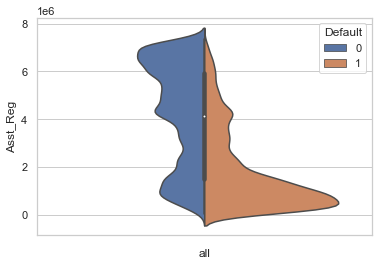

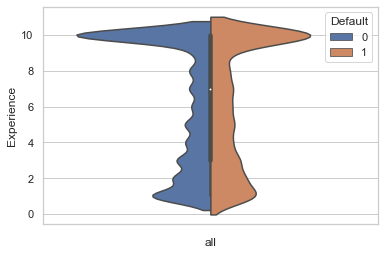

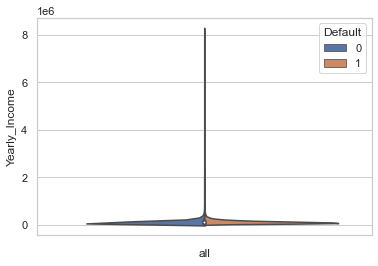

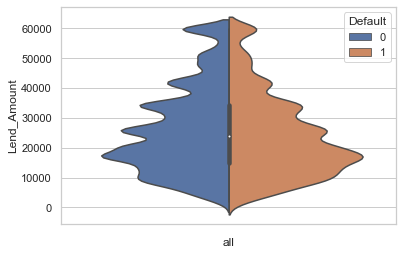

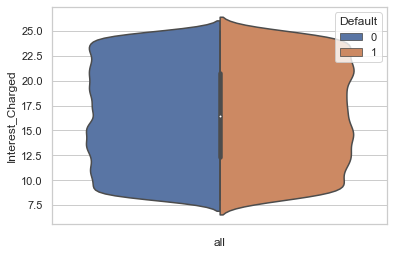

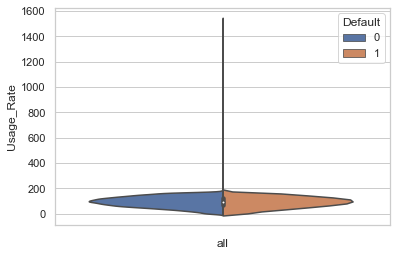

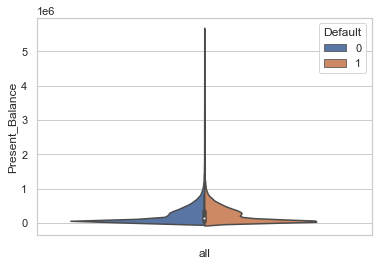

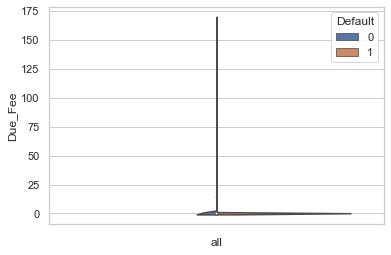

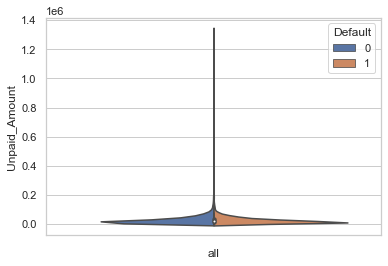

In [130]:
#gráfico obriga a que se dê um x, por isso criou-se uma feature que é um conjunto vazio
#esta é uma feature que depois é apagada
#nesta parte, já tentamos relacionar as variáveis continuas com o nosso label
#vamos comparar a distribuição para defalt=0 vs default=1
#exemplo para total assets: as pessoas que incumprem tendencialmente têm menos assets
#como se vê no gráfico? parte laranja (incumprimentos) está mais concentrada perto do zero, vs parte azul
df['all']=""
sns.set(style="whitegrid")
for i in vnumcont:
    plt.figure()
    sns.violinplot(data=df,y=i,x='all',hue='Default',split=True)#, palette="Set2", dodge=True)
    
df.drop('all',axis=1)

<ipython-input-145-30f80a4def5f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcont_trunc['all']=""
<ipython-input-145-30f80a4def5f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numcont_trunc[i]=numcont_trunc[i].clip(upper=up)


,Asst_Reg,Experience,Yearly_Income,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Due_Fee,Unpaid_Amount,Default
0,421802,10,220000.00,42023.25,15.39,88.924,564636.185,0.0,31216.05,0
1,3964312,7,85483.20,38133.00,9.94,102.856,269234.060,0.0,11660.49,0
2,4247560,1,79200.00,17100.00,22.35,60.372,22476.530,0.0,5637.87,0
3,197179,1,61600.00,5130.00,10.36,116.272,15242.090,0.0,15607.17,1
4,4646684,2,68053.92,19665.00,13.68,127.280,65433.940,0.0,27472.86,0
...,...,...,...,...,...,...,...,...,...,...
87494,5409793,1,220000.00,20520.00,12.62,87.720,350087.110,0.0,10383.12,0
87495,4535984,10,75680.00,10260.00,8.35,51.084,15100.140,0.0,10012.05,0
87496,2624710,3,90423.52,27360.00,23.32,129.172,102811.880,0.0,24921.54,0
87497,5966919,10,91520.00,8550.00,11.03,83.420,14584.110,0.0,14517.90,0


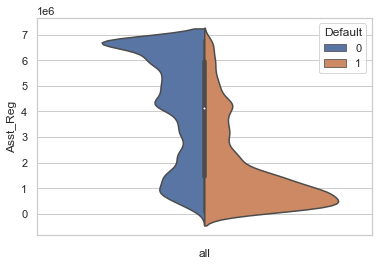

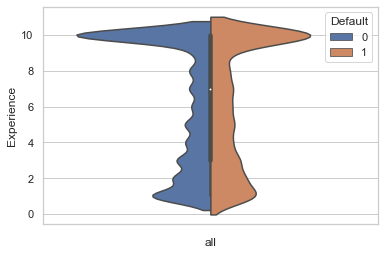

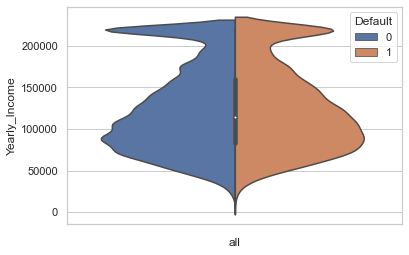

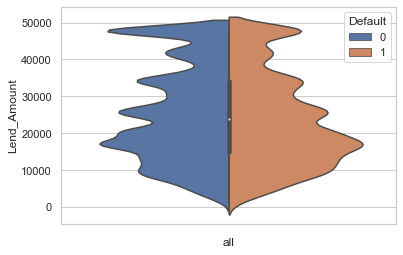

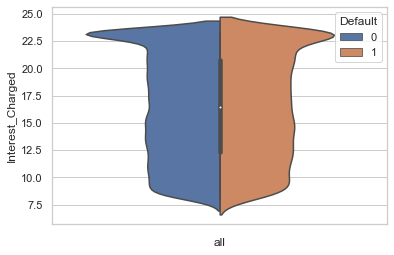

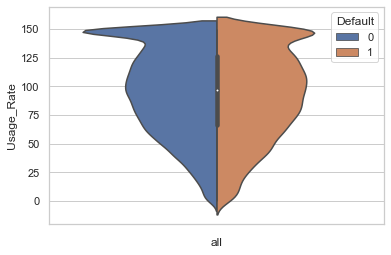

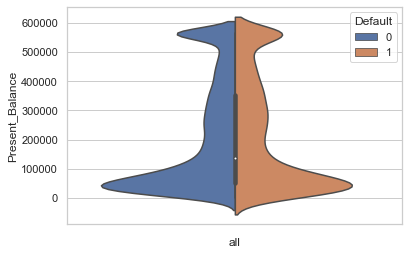

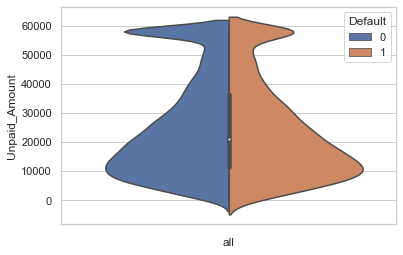

In [145]:
#acima não dá para ver bem nas features que têm outlier
#fazemos um tecto máximo nos valores dos outliers, para melhor análise (função .clip())
#tecto é valor do quantil 90%
#tirar o due_fee porque quantil 90% é 0: fica uma coluna de zeros!
vnumcont_trunc=vnumcont+['Default']
numcont_trunc=df[vnumcont_trunc]

numcont_trunc['all']=""
sns.set(style="whitegrid")
for i in vnumcont:
    if i!='Due_Fee':
        up=numcont[i].quantile(0.9)
        numcont_trunc[i]=numcont_trunc[i].clip(upper=up)
        plt.figure()
        sns.violinplot(data=numcont_trunc,y=i,x='all',hue='Default',split=True)#, palette="Set2", dodge=True)
    
numcont_trunc.drop('all',axis=1)

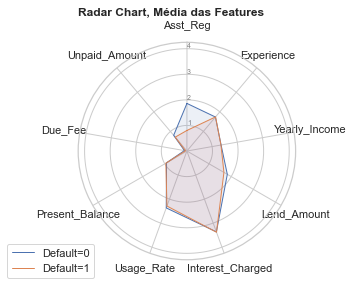

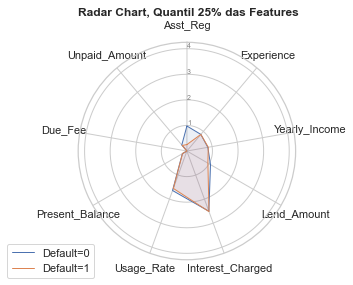

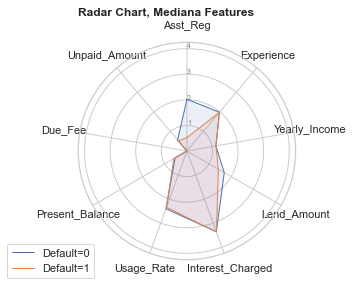

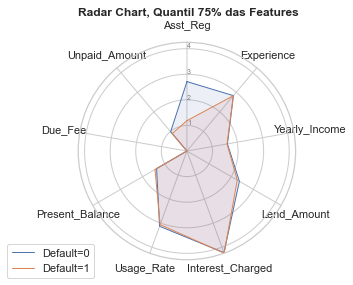

In [195]:
#RADAR CHART
#ver como uma estatistica das features numéricas contínuas (média, quantis) varia para os 2 grupos da label
#Dividimos pelo desvio padrão para ter a mesma escala: todas as diferenças de entre os 2 grupos são
#em unidades de desvio padrão
#comparar relação quando default=0 vs =1 para média, quantil 0.25, median e quantil 0.5
def spider(ncradar,nome):
    categories=list(ncradar)
    N = len(categories)# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * 3.14 for n in range(N)]
    angles += angles[:1]
    # Initialise the spider plot
    plt.figure()
    ax = plt.subplot(111, polar=True)
    # If you want the first axis to be on top:
    ax.set_theta_offset(3.14 / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4], ["1","2","3","4"], color="grey", size=7)
    plt.ylim(0,4.25)
    # ------- PART 2: Add plots
    # Name1
    values=ncradar.loc[0].values.flatten().tolist()
    values += values[:1]
    #display(angles)
    #display(values)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Default=0")
    ax.fill(angles, values, 'b', alpha=0.1)
    # Name2
    values=ncradar.loc[1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Default=1")
    ax.fill(angles, values, 'r', alpha=0.1)
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(nome,loc='left',  x=0, y=1.1,fontweight="bold")

ncradar=(df[vnumcont].groupby(df['Default']).mean()/df[vnumcont].std())
ncradarq1=(df[vnumcont].groupby(df['Default']).quantile(0.25)/df[vnumcont].std())
ncradarq2=(df[vnumcont].groupby(df['Default']).quantile(0.5)/df[vnumcont].std())
ncradarq3=(df[vnumcont].groupby(df['Default']).quantile(0.75)/df[vnumcont].std())
spider(ncradar,'Radar Chart, Média das Features')
spider(ncradarq1,'Radar Chart, Quantil 25% das Features')
spider(ncradarq2,'Radar Chart, Mediana Features')
spider(ncradarq3,'Radar Chart, Quantil 75% das Features')

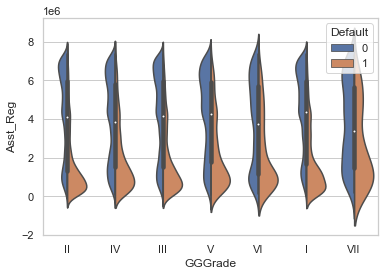

In [136]:
sns.set(style="whitegrid")
sns.violinplot(data=df,y='Asst_Reg',x='GGGrade',hue='Default',split=True)#, palette="Set2", dodge=True)

In [ ]:
sns.set(style="whitegrid")
sns.violinplot(data=df,y='Asst_Reg',x='Home_Status',hue='Default',split=True)#, palette="Set2", dodge=True)

In [139]:
##DATA FRAME COM VARIÁVEIS NUMERICAS DISCRETAS
#criar dataframe de variaveis numericas discretas
vnumdisc=['Unpaid_2_years','Already_Defaulted','Account_Open','Duration']
numdisc=df[vnumdisc].copy()
numdisc.head()
#TEMOS QUE TER PELO MENOS UMA VARIÁVEL ORDINAL

,Unpaid_2_years,Already_Defaulted,Account_Open,Duration
0,0,0,17,3
1,0,0,15,5
2,0,0,7,5
3,0,0,9,3
4,0,0,10,5


In [140]:
numdisc.describe()

,Unpaid_2_years,Already_Defaulted,Account_Open,Duration
count,77376.000000,77376.000000,77376.000000,77376.000000
mean,0.331873,0.005609,12.781961,3.627197
std,0.875049,0.083197,5.381400,0.927917
min,0.000000,0.000000,2.000000,3.000000
25%,0.000000,0.000000,9.000000,3.000000
50%,0.000000,0.000000,12.000000,3.000000
75%,0.000000,0.000000,16.000000,5.000000
max,18.000000,6.000000,83.000000,5.000000


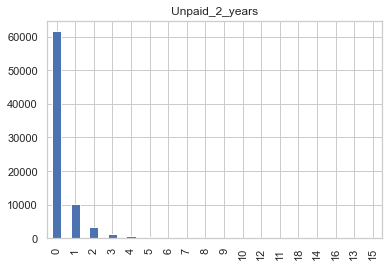

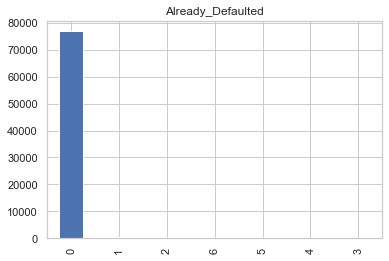

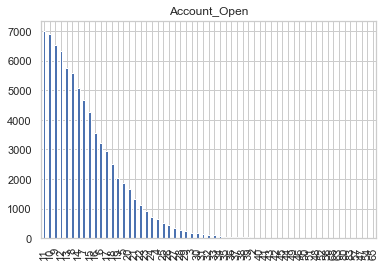

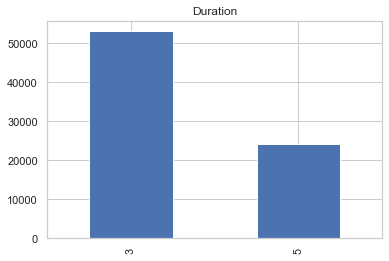

In [196]:
#histograma de tudo o que está em numdisc
for i in numdisc.columns:
    plt.figure()
    numdisc[i].value_counts().plot(kind='bar',title=i)

In [208]:
nd=df['Default'].groupby(df['Account_Open']).sum()/df['Default'].groupby(df['Account_Open']).count()
display(nd)
sns.catplot(data=nd, kind="bar", alpha=.6, height=6)

Account_Open
2     0.312500
3     0.204678
4     0.162205
5     0.184466
6     0.188275
7     0.196700
8     0.194803
9     0.197423
10    0.206453
11    0.199544
12    0.195776
13    0.188997
14    0.189349
15    0.190096
16    0.187747
17    0.191023
18    0.172962
19    0.178765
20    0.173181
21    0.166415
22    0.147321
23    0.167217
24    0.154278
25    0.164122
26    0.170561
27    0.148148
28    0.153257
29    0.132743
30    0.121212
31    0.108696
32    0.068627
33    0.125000
34    0.079365
35    0.065217
36    0.162791
37    0.000000
38    0.000000
39    0.050000
40    0.153846
41    0.250000
42    0.000000
43    0.000000
44    0.000000
45    0.000000
46    0.000000
47    0.000000
48    0.500000
49    0.333333
50    0.333333
51    0.000000
52    0.000000
54    0.000000
56    0.000000
57    0.000000
63    0.000000
65    0.000000
68    0.000000
80    0.000000
83    0.000000
Name: Default, dtype: float64

KeyError: 0

In [142]:
#DATA FRAME COM VARIÁVEIS CATEGORICAS + ORDINAL
#TEMOS QUE INSERIR UMA VARIAVEL ORDINAL!!!!!!!!!!!!!!! COLOCAR GGGRADE
#dataframe features categoricas
vcat=['Home_Status','State','Reason','Claim_Type','GGGrade']
cat=df[vcat].copy()
cat.head()

,Home_Status,State,Reason,Claim_Type,GGGrade
0,MORTGAGE,California,debt consolidation,I,II
1,RENT,NC,debt consolidation,I,IV
2,RENT,Florida,major purchase,I,III
3,RENT,NewJersey,major purchase,I,III
4,RENT,LA,debt consolidation,I,V


In [143]:
cat.describe()

,Home_Status,State,Reason,Claim_Type,GGGrade
count,77376,77376,77376,77376,77376
unique,5,49,13,2,7
top,MORTGAGE,California,debt consolidation,I,II
freq,39077,11194,46471,77337,22020


MORTGAGE    39077
RENT        30853
OWN          7436
OTHER           6
NONE            4
Name: Home_Status, dtype: int64
California    11194
Newyork        6414
TX             6307
Florida        5149
IL             3091
NewJersey      2877
PA             2797
Ohio           2602
GA             2572
VA             2251
NC             2230
MI             1995
Maryland       1857
AZ             1797
MA             1764
CO             1685
WA             1627
MN             1493
IN             1276
MO             1253
TN             1184
CT             1172
NV             1039
AL              999
WI              990
OR              929
LA              908
SC              888
KY              728
KS              722
OK              676
AR              564
UT              556
NM              424
HI              423
MS              370
NH              365
WV              344
RI              337
MT              225
DC              206
DE              205
AK              198
WY              16

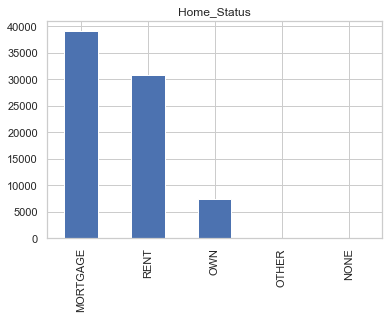

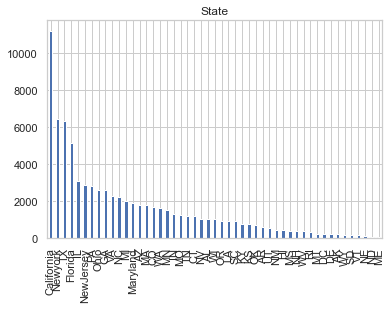

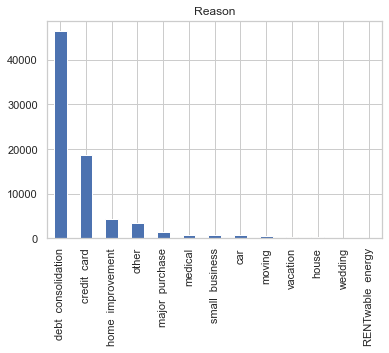

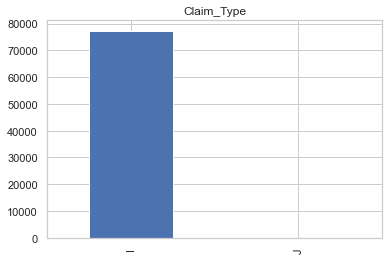

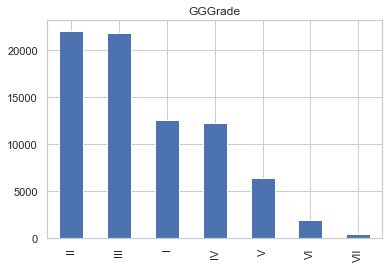

In [144]:
#fazer histograma das categoricas e value_counts (para ver se há categorias de pouca relevancia)
for i in cat.columns:
    plt.figure()
    print(cat[i].value_counts())
    cat[i].value_counts().plot(kind='bar',title=i)

In [20]:
#ver correlações
#falta acrescentar label
vnum=vnumcont+vnumdisc
#print(vnum)
vnumlabel=vnum+['Default']
#print(vnumlabel)
df[vnumlabel].corr()
#cuidado com a corr nas categoricas! não temos
#mas confirmar, que posso fazer .corr() com binárias

,Asst_Reg,Experience,Yearly_Income,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Due_Fee,Unpaid_Amount,Unpaid_2_years,Already_Defaulted,Account_Open,Duration,Default
Asst_Reg,1.000000,-0.011723,0.035239,0.037186,-0.002571,-0.074240,0.011439,-0.064270,0.032632,0.035024,0.009119,0.055357,0.060966,-0.413878
Experience,-0.011723,1.000000,0.065124,0.092587,-0.001331,0.035039,0.099956,-0.005956,0.086779,0.015887,0.006864,0.030261,0.057528,0.002072
Yearly_Income,0.035239,0.065124,1.000000,0.377743,0.000422,0.046129,0.480897,0.010549,0.346428,0.047839,0.015697,0.146856,0.060152,-0.002147
Lend_Amount,0.037186,0.092587,0.377743,1.000000,-0.002254,0.114093,0.322504,0.036823,0.343429,-0.013663,0.000499,0.179493,0.408658,-0.059757
Interest_Charged,-0.002571,-0.001331,0.000422,-0.002254,1.000000,-0.001309,-0.002172,-0.001261,0.003999,0.000443,-0.001045,0.000167,0.000910,0.005430
Usage_Rate,-0.074240,0.035039,0.046129,0.114093,-0.001309,1.000000,0.080116,0.024741,0.219969,-0.016255,-0.027518,-0.159320,0.082862,-0.030807
Present_Balance,0.011439,0.099956,0.480897,0.322504,-0.002172,0.080116,1.000000,0.008945,0.431912,0.062572,0.020049,0.243721,0.107377,0.012020
Due_Fee,-0.064270,-0.005956,0.010549,0.036823,-0.001261,0.024741,0.008945,1.000000,-0.004922,0.022799,0.009956,-0.003249,0.012196,-0.016577
Unpaid_Amount,0.032632,0.086779,0.346428,0.343429,0.003999,0.219969,0.431912,-0.004922,1.000000,-0.035108,0.002057,0.220226,0.090940,-0.036908
Unpaid_2_years,0.035024,0.015887,0.047839,-0.013663,0.000443,-0.016255,0.062572,0.022799,-0.035108,1.000000,0.139529,0.045653,-0.006936,-0.030099


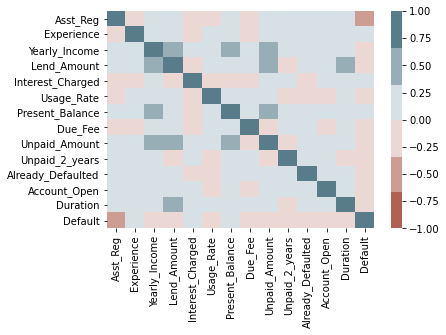

In [21]:
c=df[vnumlabel].corr()
sns.heatmap(c,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,50))

In [26]:
#fazer split train/test, mantendo % de defaults=1 nos 2 subsets
train_set, test_set = train_test_split(df,test_size=0.2,random_state=1,stratify = df['Default'])
print(train_set['Default'].sum()/train_set['Default'].shape[0])
print(test_set['Default'].sum()/test_set['Default'].shape[0])
#ver como fazer para manter a % de defaults entre train e test!

0.18906300484652666
0.18906694236236754


In [212]:
#pipeline
d_ix=3
i_ix=2

class NewAttributes(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        debt_to_income=X[:,d_ix]/X[:,i_ix]
        
        return np.c_[X,debt_to_income]

In [210]:
new_attr=NewAttributes()
extravar=new_attr.fit_transform(numcont.values)
display(numcont.head())
display(extravar[:,-1])
df['Lend_Amount']/df['Yearly_Income']

,Asst_Reg,Experience,Yearly_Income,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Due_Fee,Unpaid_Amount
0,421802,10,633600.00,42023.25,15.39,88.924,607161.90,0.0,31216.05
1,3964312,7,85483.20,38133.00,9.94,102.856,269234.06,0.0,11660.49
2,4247560,1,79200.00,17100.00,22.35,60.372,22476.53,0.0,5637.87
3,197179,1,61600.00,5130.00,10.36,116.272,15242.09,0.0,15607.17
4,4646684,2,68053.92,19665.00,13.68,127.280,65433.94,0.0,27472.86


array([0.06632457, 0.44608765, 0.21590909, ..., 0.30257614, 0.0934222 ,
       0.38586039])

0        0.066325
1        0.446088
2        0.215909
3        0.083279
4        0.288962
           ...   
87494    0.083279
87495    0.135571
87496    0.302576
87497    0.093422
87498    0.385860
Length: 77376, dtype: float64

In [211]:
pipeline_num=Pipeline([
    #('imputer',SimpleImputer(strategy='median')),
    ('attr_add',NewAttributes()),
    ('std_scale',StandardScaler())
])

print(numcont.head())
alltranfnum=pipeline_num.fit_transform(numcont)
alltranfnum


   Asst_Reg  Experience  Yearly_Income  Lend_Amount  Interest_Charged  \
0    421802          10      633600.00     42023.25             15.39   
1   3964312           7       85483.20     38133.00              9.94   
2   4247560           1       79200.00     17100.00             22.35   
3    197179           1       61600.00      5130.00             10.36   
4   4646684           2       68053.92     19665.00             13.68   

   Usage_Rate  Present_Balance  Due_Fee  Unpaid_Amount  
0      88.924        607161.90      0.0       31216.05  
1     102.856        269234.06      0.0       11660.49  
2      60.372         22476.53      0.0        5637.87  
3     116.272         15242.09      0.0       15607.17  
4     127.280         65433.94      0.0       27472.86  


TypeError: '(slice(None, None, None), 3)' is an invalid key

In [ ]:
attr_num=numcont.columns
attr_cat=cat.columns

global_pipeline=ColumnTransformer([
    ('num',pipeline_num,attr_num),
    ('cat',OneHotEncoder(),attr_cat)
])

preprocessed=global_pipeline.fit_transform(instances)

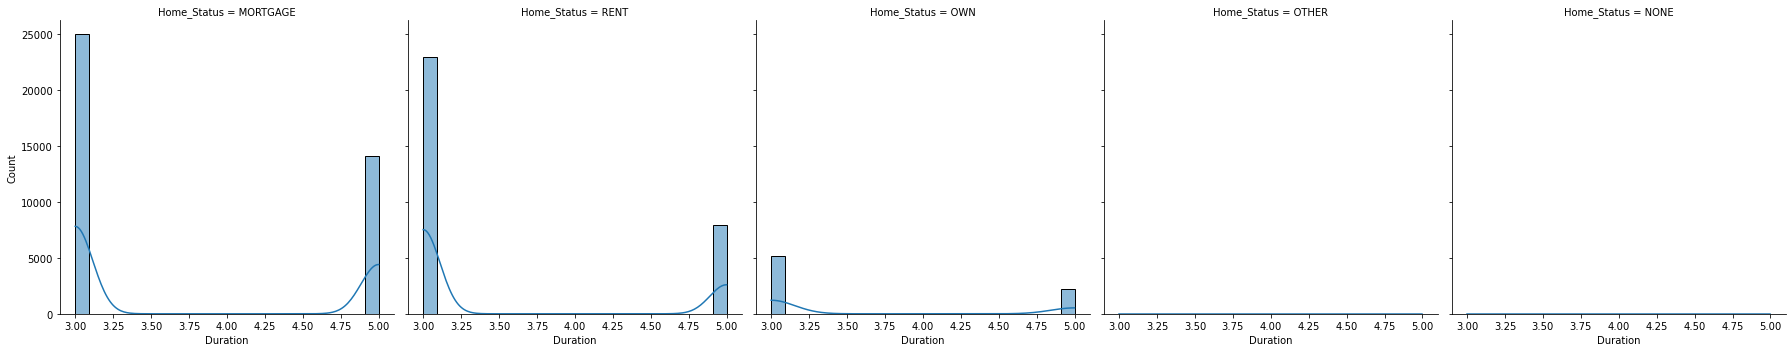

In [139]:
sns.displot(data=df,x="Duration",col="Home_Status",kde=True)

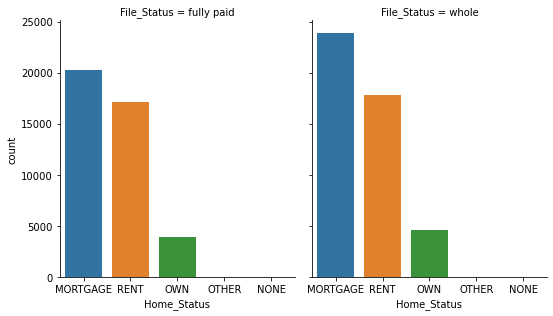

In [112]:

g = sns.catplot(x="Home_Status", col="File_Status", col_wrap=8, 
                data=countable, 
                kind="count", height=4.5, aspect=.8)

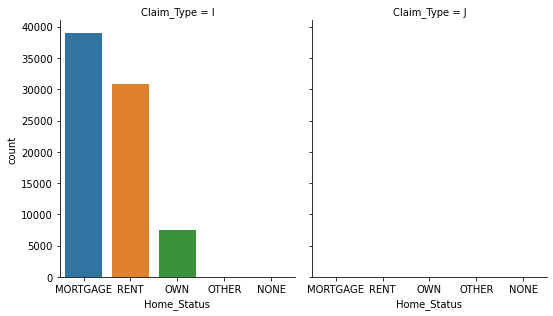

In [141]:

g = sns.catplot(x="Home_Status", col="Claim_Type", col_wrap=8, 
                data=countable, 
                kind="count", height=4.5, aspect=.8)